## Avaliando algoritmos de Classificação - Tuning de parâmetros com `GridSearch`  
- Näive Bayes: 93.80   
- Árvore de decisão: 98.2
- Random Forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão Logística: 94.60
- SVM: 98.8

In [1]:
import pickle
import numpy as np

# Para não aparecer avisos de warning no GridSearchCV
# Quando chegar na parte da rede neural - convergência
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier      # Arvore de Decisão
from sklearn.ensemble import RandomForestClassifier  # RandomForest
from sklearn.neighbors import KNeighborsClassifier   # k-vizinhos mais próximos (KNN)
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.svm import SVC                          # Maquina de Vetor Suporte SVM
from sklearn.neural_network import MLPClassifier     # Multlayer Perceptron

In [4]:
with open('credit.pkl', 'rb') as file:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [5]:
print(f'Base teste - shape: {X_credit_train.shape, y_credit_train.shape}') # 1500
print(f'Base treino - shape: {X_credit_test.shape, y_credit_test.shape}') # 500

Base teste - shape: ((1500, 3), (1500,))
Base treino - shape: ((500, 3), (500,))


Ao fazer o CrossValidation (CV) usaremos todos os registros. Para isso, concatena-se os arrays usando numpy.

In [6]:
X_credit = np.concatenate( (X_credit_train, X_credit_test), 
                          axis=0)
y_credit = np.concatenate( (y_credit_train, y_credit_test),
                          axis=0)

print(f'{X_credit.shape=}, {y_credit.shape=}')

X_credit.shape=(2000, 3), y_credit.shape=(2000,)


A classe GridSearchCV recebe como parâmetro `param_grid`. Abaixo encontra-se o dicionário contendo os parâmetros de cada classificador que iremos testar.

In [7]:
params_forest = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
params_rnd_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,5, 10]
}
params_knn = {'n_neighbors': [ 3, 5, 10, 20], 'p': [1, 2]}
params_lr = {
    'tol': [1e-4, 1e-5, 1e-6], 
    'C': [1.0, 1.5, 2.0],
    'solver': ['lbfgs', 'sag', 'saga']
}
params_svm = {
    'tol': [1e-3, 1e-4, 1e-5], 
    'C': [1.0, 1.5, 2.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
params_mlpc = {
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'batch_size': [10, 56]
}

In [8]:
### Instanciando os classificadores sem hiperparâmetros ###

# Arvore de Decisao
forest = DecisionTreeClassifier()

# RandomForest
rnd_forest = RandomForestClassifier() 

# KNN
knn = KNeighborsClassifier()     

# Regressao Linear
lr = LogisticRegression()

# SVM
svm = SVC()

# MLP 
mlpc = MLPClassifier()

In [9]:
classificadores = {
    'FOREST': forest,
    'RF': rnd_forest,
    'KNN':knn,
    'SVM':svm,
    'LR':lr,
    'MLP':mlpc
}

param_grids = {
    'FOREST': params_forest,
    'RF':params_rnd_forest,
    'KNN':params_knn,
    'SVM':params_svm,
    'LR':params_lr,
    'MLP':params_mlpc
}

In [10]:
classificadores.values()

dict_values([DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(), MLPClassifier()])

Agora vamos criar variáveis que irão armazenar o valor de cada um dos algoritmos após o Grid Search. A estrutura é a seguinte:
```python
grid_search = GridSearchCV(estimator= ..., param_grid=...)
grid_search.fit(X_credit, y_credit)
best_params = grid_search.best_params_
melhor_resultado = grid_search.best_score_
```

No estimators do GridSearch, equivale um loop sobre as chaves do dicionário classificadores.

In [11]:
melhores_parametros = {}
melhores_resultados = {}


# iterando sobre todos os modelos treinados
for clf_name, clf in classificadores.items():
    # print(f'{clf_name=}')
    # print(f'estimator = {classificadores[clf_name]}, param_grid= {param_grids[clf_name]}')
    # print()
    grid_search = GridSearchCV(estimator=classificadores[clf_name], param_grid=param_grids[clf_name])
    grid_search.fit(X_credit, y_credit)
    melhores_parametros[clf_name] = grid_search.best_params_
    melhores_resultados[clf_name] = grid_search.best_score_

In [12]:
melhores_parametros

{'FOREST': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 'RF': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 'KNN': {'n_neighbors': 20, 'p': 1},
 'SVM': {'C': 1.5, 'kernel': 'rbf', 'tol': 0.001},
 'LR': {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001},
 'MLP': {'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}}

In [13]:
melhores_resultados

{'FOREST': 0.983,
 'RF': 0.9865,
 'KNN': 0.9800000000000001,
 'SVM': 0.9829999999999999,
 'LR': 0.9484999999999999,
 'MLP': 0.9964999999999999}

### Visualizando os dados 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

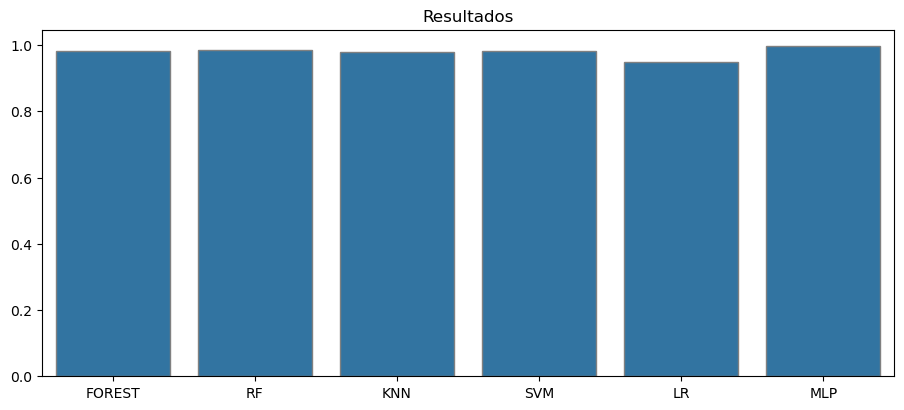

In [32]:
# Figura Regressor
fig, axs = plt.subplots(figsize=(11, 4.5))

plt.title('Resultados')
sns.barplot(x=melhores_resultados.keys(), y =melhores_resultados.values(), edgecolor='grey');